### LOGISTIC REGRESSION WITH IRIS DATASET

Objective: Use logistic regression to classify Iris flowers into one of three species based on the flower's petal and sepal measurements

IMPRORT NECESSARY LIBRARIES

In [1]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import seaborn as sns

LOAD DATA

In [2]:
iris = load_iris()

CONVERT THE DATA TO A DATAFRAME

In [3]:
# Convert the data to a DataFrame
df = pd.DataFrame(data=iris.data, columns=iris.feature_names)

# Add the target values to the DataFrame
df['target'] = iris.target

# Optionally, map the target to the target names for better readability
df['target_name'] = df['target'].map({i: name for i, name in enumerate(iris.target_names)})

SET X AND Y

In [4]:
# Drop 'target' and 'target_name' columns to get the features
X = df.drop(['target', 'target_name'], axis=1)

# Assign the 'target' column to y
y = df['target']

# Check the shapes to ensure they are consistent
print(X.shape)
print(y.shape)

(150, 4)
(150,)


SPLIT THE DATA INTO TRAIN AND TEST

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

LOAD THE LINEAR MODEL

In [6]:
model = LogisticRegression()

FIT THE MODEL TO THE DATA

In [7]:
model.fit(X_train, y_train)

LogisticRegression()

PREDICT

In [8]:
y_prediction = model.predict(X_test)

In [9]:
# Flower types we are trying to classify
# setosa, versicolor, virginica

TEST THE MODEL

In [10]:
# Accuracy test
print(accuracy_score(y_test, y_prediction))

1.0


In [11]:
# Classification report
print(classification_report(y_test, y_prediction))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



In [15]:
# Confusion matrix
cm = confusion_matrix(y_test, y_prediction)
cm

array([[10,  0,  0],
       [ 0,  9,  0],
       [ 0,  0, 11]], dtype=int64)

The model seems to be overfitting due to the fact that our dataset is actually very small.

<Axes: >

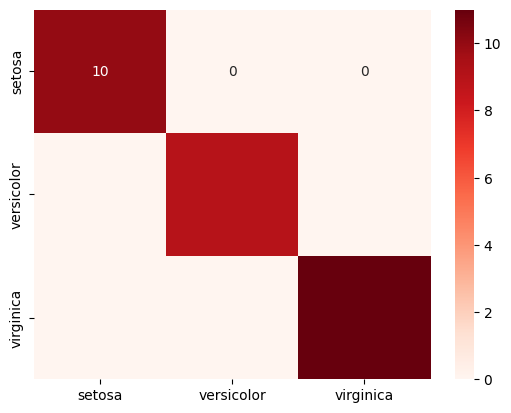

In [16]:
sns.heatmap(cm, cmap='Reds', xticklabels=iris.target_names, annot=True, yticklabels=iris.target_names)

NOTES FOR ME

A classification report is another way to evaluate the performance of a classification model, particularly useful alongside a confusion matrix. It provides more detailed information than the confusion matrix itself.

**Breakdown of a Classification Report**

Imagine a table with several columns and rows. Here's what each part typically represents:

* **Rows:** Each row represents a class in your classification problem. There will be one row for every class the model is trying to predict.
* **Columns:** Here are some common columns you'll encounter:
    * **Class Name:** The name of the particular class.
    * **Precision:**  This metric reflects the portion of positive predictions that were truly positive for a specific class. In simpler terms, out of all the instances the model predicted as this class, how many were actually that class?
    * **Recall:** This metric focuses on the actual positive cases. It tells you what proportion of the actual positives were correctly identified by the model for a specific class. For instance, out of all the actual instances that belong to this class, how many did the model predict correctly?
    * **F1-Score:** This combines precision and recall into a single metric, taking the harmonic mean of both. A value closer to 1 indicates better performance. 
    * **Support:** This represents the total number of instances in the actual dataset belonging to that particular class.

The report often includes additional rows for overall averages across all classes, providing a summary of the model's performance. There might be macro average (unweighted mean), weighted average (considering class sizes), and sometimes micro average (treating each instance equally).

**Understanding Classification Report Metrics**

* **Precision vs Recall:** They provide a trade-off. A high precision for a class indicates the model rarely makes false positive predictions for that class. On the other hand, a high recall means the model does a good job identifying most of the actual positive cases for that class. An ideal scenario would have both high precision and recall, but sometimes there might be a trade-off to consider.
* **F1-Score:** This metric tries to balance precision and recall into a single score. It's a good way to get a general sense of a class's performance, especially when the balance between precision and recall is important. 

**Benefits of Classification Report**

* **Detailed class-wise performance:** Provides insights into how well the model performs for each individual class.
* **Complements confusion matrix:** Offers a more in-depth analysis alongside the visual overview from the confusion matrix.
* **Identifies class imbalances:** Can reveal if the model struggles with specific classes due to imbalanced data.

By combining a confusion matrix and a classification report, you gain a comprehensive understanding of your classification model's performance, allowing for better model evaluation and improvement strategies.